# Proyecto 1. Estadística Descriptiva

## Introducción

<p style="text-align: justify">
En los últimos años se ha propagado un enfermedad de las plantas de cítricos a nivel mundial. La enfermedad se le conoce como "Dragón amarillo” y es generada por una bacteria que la transmite un psílido procedente de la región asiática llamado Diaphorina.
    
<p style="text-align: justify">

Esta enfermedad reduce la producción de cítricos, además de que reduce su tamaño. México no está exento de este problema. Para estimar la magnitud, ubicación y posible propagación geográfica del problema, se colocan trampas de Diaphorinas en los plantíos. En el archivo llamado “capturas_2015-2020.xls” está el monitoreo de dichas trampas desde 2015 hasta 2020.

Un indicador de la dispersión es el índice de dispersión (Id) dado por

\begin{equation}
Id = \frac{\sigma^2}{\bar{x}}
\end{equation}
<p style="text-align: justify">

Donde $\sigma^2$ es la varianza de la muestra y $\bar{x}$ es la media muestral. Notar que los datos de donde se obtiene $\sigma$  y $\bar{x}$ son los correspondientes a cada ubicación geográfica (trampa) y no a cada toma de muestra. Es decir, es necesario primero obtener el promedio temporal de diaphorinas por ubicación (trampa o municipio) y posteriormente se podrá calcular el índice con estos datos por ubicación (trampa o municipio). Los valores iguales a 1 del índice Id indican una disposición espacial aleatoria, menos que 1 indica una disposici+on espacial regular o uniforme, y los valores significativamente mayores que 1 indican una disposición agregada.
<p style="text-align: justify">
    
El Coeficiente de Green (Cx) es otra métrica para evaluar la agregación o uniformidad de una distribución y está dado por
    
\begin{equation}
 C_x = \frac{\left(\sigma^2/\bar{x}\right)-1}{\sum x -1}
 \end{equation}
<p style="text-align: justify">

Valores negativos de este índice $C_x$ muestran un patrón unforme, valores positivos muestran un patrón de agregación y valores iguales a 0 representan una distribución aleatoria. 
    
## Problema
<p style="text-align: justify">

1.  Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes
de los años 2015, 2017,2020. Es decir una gráfica por cada año donde el eje horizontal esté el mes y el vertical el promedio de diaphorinas por trampa.
<p style="text-align: justify">

    
2. Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes del año 2020 pero sólo de un municipio.
<p style="text-align: justify">
    
3. Hacer una tabla donde la primera columna sea el mes, la segunda el índice Id (por trampa) y la tercera el índice $C_x$ para el año 2015.
<p style="text-align: justify">

4.  Hacer una gráfica del índice Id (por trampa) como función del mes que
abarque desde 2015 hasta 2020.
<p style="text-align: justify">
    
5. Hacer una gráfica del centro de masa de las diaphorinas como función del mes que abarque de 2017 a 2020. Nota: $CM=pos*Diaph/Ntrampas$, donde CM se refiere al centro de masa, pos es la posición de la trampa, Diaph es el promedio de diaphorinas en la trampa y Ntrampas es el número de trampas que se consideraron en el cálculo.


# Importamos librerías 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importamos los datos

In [2]:
year2015 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 0)
year2016 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 1)
year2017 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 3)
year2018 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 4)
year2019 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 5)
year2020 = pd.read_excel('capturas_2015-2020.xlsx', sheet_name = 6)

In [3]:
year2015

,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Fenologia,Superficie_ha,No_Trampas_Instaladas,No_Trampas_Revisadas,No_DiaphorinasXtrampa,Mes,Semana
0,2015-01-22,24.11564,-99.03734,177_THUE05-28-030-0415T01,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),25.0,0.0,1.0,0.0,1.0,4.0
1,2015-01-29,24.11564,-99.03734,177_THUE05-28-030-0415T01,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),25.0,1.0,1.0,0.0,1.0,5.0
2,2015-01-29,24.11562,-99.03560,177_THUE05-28-030-0415T02,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,1.0,1.0,0.0,1.0,5.0
3,2015-01-22,24.11562,-99.03560,177_THUE05-28-030-0415T02,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,0.0,1.0,0.0,1.0,4.0
4,2015-01-29,24.11726,-99.03528,177_THUE05-28-030-0415T03,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,1.0,1.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421355,2015-12-25,24.05003,-98.88733,177_THUE05-28-030-0700T17,PADILLA,padilla,MARTINEZ_BROHEZ_FEDERICO,NARANJA,FRUCTIFICACIÓN,0.0,0.0,1.0,0.0,12.0,52.0
421356,2015-12-18,24.04981,-98.88465,177_THUE05-28-030-0700T18,PADILLA,padilla,MARTINEZ_BROHEZ_FEDERICO,NARANJA,DESARROLLO (crecimiento),0.0,0.0,0.0,0.0,12.0,51.0
421357,2015-12-25,24.04981,-98.88465,177_THUE05-28-030-0700T18,PADILLA,padilla,MARTINEZ_BROHEZ_FEDERICO,NARANJA,FRUCTIFICACIÓN,0.0,0.0,1.0,0.0,12.0,52.0
421358,2015-12-11,24.04981,-98.88465,177_THUE05-28-030-0700T18,PADILLA,padilla,MARTINEZ_BROHEZ_FEDERICO,NARANJA,DESARROLLO (crecimiento),0.0,0.0,0.0,0.0,12.0,50.0


<p style="text-align: justify">

1.  Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes
de los años 2015, 2017,2020. Es decir una gráfica por cada año donde el eje horizontal esté el mes y el vertical el promedio de diaphorinas por trampa.

In [4]:
group2015 = year2015.groupby(['Mes']).agg({'No_DiaphorinasXtrampa': np.mean})
group2015.set_axis(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], axis = 0, inplace = True)
group2015

,No_DiaphorinasXtrampa
Enero,0.092308
Febrero,0.116510
Marzo,0.160865
Abril,0.105462
Mayo,0.037114
Junio,0.033045
Julio,0.039220
Agosto,0.114808
Septiembre,0.156186
Octubre,0.175519


<AxesSubplot:>

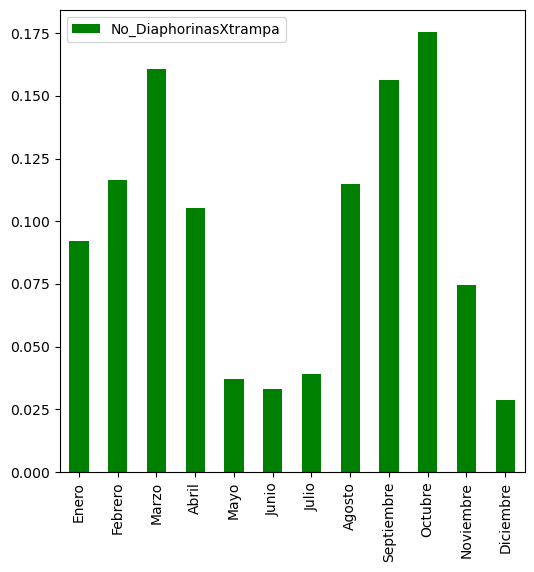

In [5]:
group2015.plot.bar(figsize = (6,6), color = 'g')

In [6]:
group2017 = year2017.groupby(['Mes']).agg({'No_DiaphorinasXtrampa': np.mean})
group2017.set_axis(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], axis = 0, inplace = True)
group2017

,No_DiaphorinasXtrampa
Enero,0.149725
Febrero,0.277747
Marzo,0.566026
Abril,0.282143
Mayo,0.513049
Junio,0.817857
Julio,0.303541
Agosto,0.568561
Septiembre,0.644505
Octubre,0.518407


<AxesSubplot:>

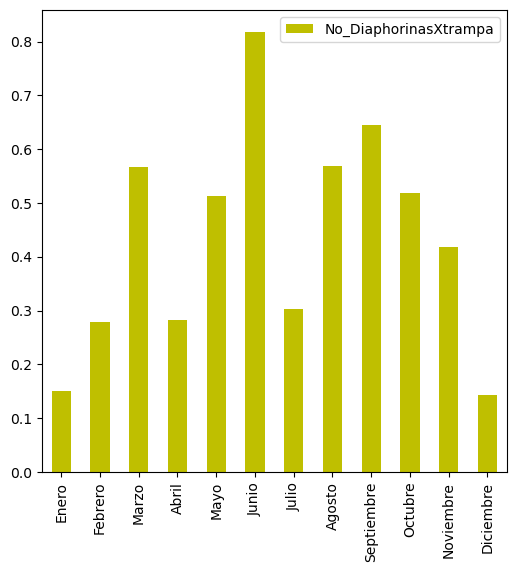

In [7]:
group2017.plot.bar(figsize = (6,6), color = 'y')

In [8]:
group2020 = year2020.groupby(['Mes']).agg({'DiaphorinaXTrampa': np.mean})
group2020.set_axis(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], axis = 0, inplace = True)
group2020

,DiaphorinaXTrampa
Enero,0.378565
Febrero,0.750304
Marzo,0.502849
Abril,0.446075
Mayo,0.249759
Junio,0.212220
Julio,0.305785
Agosto,0.289525
Septiembre,0.191505
Octubre,0.189819


<AxesSubplot:>

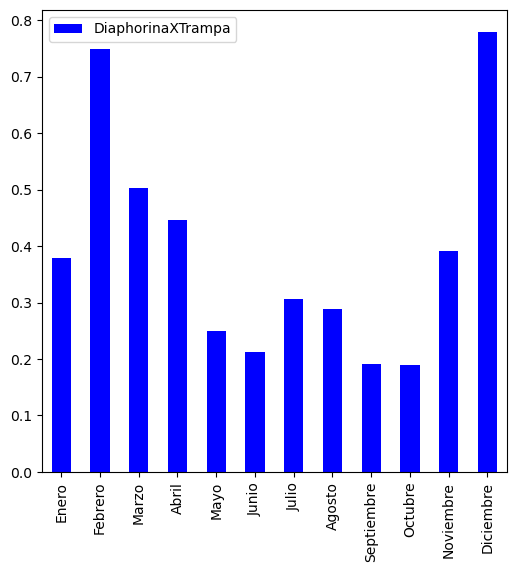

In [9]:
group2020.plot.bar(figsize = (6,6), color = 'b')

2. Hacer una gráfica del promedio de Diaphorinas por trampa para cada mes del año 2020 pero sólo de un municipio.

In [10]:
mesmuni2020 = year2020.groupby(['Municipio', 'Mes']).agg({'DiaphorinaXTrampa': np.mean}) 
mesmuni2020

DiaphorinaXTrampa
Municipio Mes                   
GUEMEZ    1             0.408345
          2             0.785759
          3             0.630379
          4             0.513235
          5             0.295492
          6             0.230448
          7             0.007463
          8             0.160682
          9             0.209453
          10            0.273210
          11            0.425111
          12            0.822393
HIDALGO   1             0.218427
          2             0.791475
          3             0.603687
          4             0.210767
          5             0.228637
          6             0.249655
          7             0.360882
          8             0.255043
          9             0.173432
          10            0.132941
          11            0.272418
          12            0.418440
LLERA     1             0.575518
          2             1.302721
          3             0.707447
          4             0.386850
          5             0.320827
          6             0.247656
          7                  NaN
          8             0.434690
          9             0.349813
          10            0.332610
          11            0.731200
          12            1.585185
PADILLA   1             0.077373
          2             0.326296
          3             0.175463
          4             0.305161
          5             0.112924
          6             0.141002
          7             0.821962
          8             0.135866
          9             0.050822
          10            0.015918
          11            0.203060
          12            0.323619
VICTORIA  1             0.908224
          2             0.906367
          3             0.550000
          4             0.966667
          5             0.242308
          6             0.201923
          7             0.079812
          8             0.745718
          9             0.301676
          10            0.136905
          11            0.370679
          12            0.696697

<AxesSubplot:>

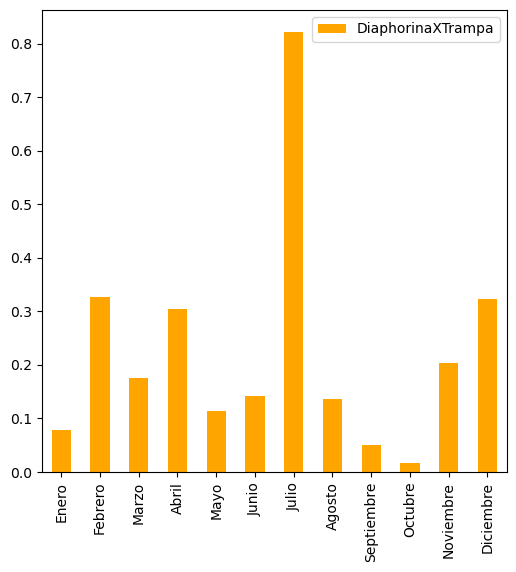

In [11]:
padilla2020 = mesmuni2020.loc['PADILLA']
padilla2020.set_axis(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], axis = 0, inplace = True)
padilla2020.plot.bar(figsize = (6,6), color = 'orange')

3. Hacer una tabla donde la primera columna sea el mes, la segunda el índice Id (por trampa) y la tercera el índice $C_x$ para el año 2015.

In [12]:
year2015_filtrados = year2015.dropna(subset = ['No_DiaphorinasXtrampa'])
year2015_filtrados

,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Fenologia,Superficie_ha,No_Trampas_Instaladas,No_Trampas_Revisadas,No_DiaphorinasXtrampa,Mes,Semana
0,2015-01-22,24.11564,-99.03734,177_THUE05-28-030-0415T01,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),25.0,0.0,1.0,0.0,1.0,4.0
1,2015-01-29,24.11564,-99.03734,177_THUE05-28-030-0415T01,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),25.0,1.0,1.0,0.0,1.0,5.0
2,2015-01-29,24.11562,-99.03560,177_THUE05-28-030-0415T02,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,1.0,1.0,0.0,1.0,5.0
3,2015-01-22,24.11562,-99.03560,177_THUE05-28-030-0415T02,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,0.0,1.0,0.0,1.0,4.0
4,2015-01-29,24.11726,-99.03528,177_THUE05-28-030-0415T03,PADILLA,Ej. Marte R. Gomez,MARTINEZ_ZAMBRANO_ROBERTA,LIMÓN,DESARROLLO (crecimiento),0.0,1.0,1.0,0.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421355,2015-12-25,24.05003,-98.88733,177_THUE05-28-030-0700T17,PADILLA,padilla,MARTINEZ_BROHEZ_FEDERICO,NARANJA,FRUCTIFICACIÓN,0.0,0.0,1.0,0.0,12.0,52.0
421356,2015-12-18,24.04981,-98.88465,177_THUE05-28-030-0700T18,PADILLA,padilla,MARTINEZ_BROHEZ_FEDERICO,NARANJA,DESARROLLO (crecimiento),0.0,0.0,0.0,0.0,12.0,51.0
421357,2015-12-25,24.04981,-98.88465,177_THUE05-28-030-0700T18,PADILLA,padilla,MARTINEZ_BROHEZ_FEDERICO,NARANJA,FRUCTIFICACIÓN,0.0,0.0,1.0,0.0,12.0,52.0
421358,2015-12-11,24.04981,-98.88465,177_THUE05-28-030-0700T18,PADILLA,padilla,MARTINEZ_BROHEZ_FEDERICO,NARANJA,DESARROLLO (crecimiento),0.0,0.0,0.0,0.0,12.0,50.0


In [13]:
trampasprom = year2015_filtrados.groupby(['Ubicacion', 'Mes']).agg({'No_DiaphorinasXtrampa': np.mean})
trampasprom.rename(columns ={'No_DiaphorinasXtrampa':'Promedio_Diaphorinas'}, inplace = True)
trampasprom

Promedio_Diaphorinas
Ubicacion                 Mes                       
177_THUE05-28-011-0001T01 2.0                    0.0
                          3.0                    0.0
                          4.0                    0.0
                          5.0                    0.0
                          6.0                    0.0
...                                              ...
177_THUE05-28-08-0002T17  8.0                    0.5
                          9.0                    0.0
                          10.0                   0.6
                          11.0                   0.5
                          12.0                   0.0

[88736 rows x 1 columns]

In [14]:
varianza = year2015_filtrados.groupby(['Ubicacion', 'Mes']).agg(varianza = ('No_DiaphorinasXtrampa', np.var))
varianza

varianza
Ubicacion                 Mes           
177_THUE05-28-011-0001T01 2.0   0.000000
                          3.0   0.000000
                          4.0   0.000000
                          5.0   0.000000
                          6.0   0.000000
...                                  ...
177_THUE05-28-08-0002T17  8.0   1.000000
                          9.0   0.000000
                          10.0  0.800000
                          11.0  0.333333
                          12.0  0.000000

[88736 rows x 1 columns]

In [15]:
trampasprom['Id'] = varianza['varianza']**2/trampasprom['Promedio_Diaphorinas']
trampasprom

Promedio_Diaphorinas        Id
Ubicacion                 Mes                                 
177_THUE05-28-011-0001T01 2.0                    0.0       NaN
                          3.0                    0.0       NaN
                          4.0                    0.0       NaN
                          5.0                    0.0       NaN
                          6.0                    0.0       NaN
...                                              ...       ...
177_THUE05-28-08-0002T17  8.0                    0.5  2.000000
                          9.0                    0.0       NaN
                          10.0                   0.6  1.066667
                          11.0                   0.5  0.222222
                          12.0                   0.0       NaN

[88736 rows x 2 columns]

In [16]:
sumapormesyubi = year2015_filtrados.groupby(['Ubicacion', 'Mes']).agg(suma = ('No_DiaphorinasXtrampa', np.sum)) 
sumapormesyubi

suma
Ubicacion                 Mes       
177_THUE05-28-011-0001T01 2.0    0.0
                          3.0    0.0
                          4.0    0.0
                          5.0    0.0
                          6.0    0.0
...                              ...
177_THUE05-28-08-0002T17  8.0    2.0
                          9.0    0.0
                          10.0   3.0
                          11.0   2.0
                          12.0   0.0

[88736 rows x 1 columns]

In [17]:
trampasprom['Cx'] = (trampasprom['Id']-1)/(sumapormesyubi['suma']-1)
trampasprom

Promedio_Diaphorinas        Id        Cx
Ubicacion                 Mes                                           
177_THUE05-28-011-0001T01 2.0                    0.0       NaN       NaN
                          3.0                    0.0       NaN       NaN
                          4.0                    0.0       NaN       NaN
                          5.0                    0.0       NaN       NaN
                          6.0                    0.0       NaN       NaN
...                                              ...       ...       ...
177_THUE05-28-08-0002T17  8.0                    0.5  2.000000  1.000000
                          9.0                    0.0       NaN       NaN
                          10.0                   0.6  1.066667  0.033333
                          11.0                   0.5  0.222222 -0.777778
                          12.0                   0.0       NaN       NaN

[88736 rows x 3 columns]

In [18]:
trampasprom['Id'] = trampasprom['Id'].fillna('Div 0')
trampasprom['Cx'] = trampasprom['Cx'].fillna('Div 0')
trampasprom

Promedio_Diaphorinas        Id        Cx
Ubicacion                 Mes                                           
177_THUE05-28-011-0001T01 2.0                    0.0     Div 0     Div 0
                          3.0                    0.0     Div 0     Div 0
                          4.0                    0.0     Div 0     Div 0
                          5.0                    0.0     Div 0     Div 0
                          6.0                    0.0     Div 0     Div 0
...                                              ...       ...       ...
177_THUE05-28-08-0002T17  8.0                    0.5       2.0       1.0
                          9.0                    0.0     Div 0     Div 0
                          10.0                   0.6  1.066667  0.033333
                          11.0                   0.5  0.222222 -0.777778
                          12.0                   0.0     Div 0     Div 0

[88736 rows x 3 columns]

4.  Hacer una gráfica del índice Id (por trampa) como función del mes que abarque desde 2015 hasta 2020.

In [36]:
trampasprom2015 = year2015_filtrados.groupby(['Ubicacion', 'Mes']).agg({'No_DiaphorinasXtrampa': np.mean})
trampasprom2015.rename(columns ={'No_DiaphorinasXtrampa':'Promedio_Diaphorinas2015'}, inplace = True)
trampasprom2015

Promedio_Diaphorinas2015
Ubicacion                 Mes                           
177_THUE05-28-011-0001T01 2.0                        0.0
                          3.0                        0.0
                          4.0                        0.0
                          5.0                        0.0
                          6.0                        0.0
...                                                  ...
177_THUE05-28-08-0002T17  8.0                        0.5
                          9.0                        0.0
                          10.0                       0.6
                          11.0                       0.5
                          12.0                       0.0

[88736 rows x 1 columns]

In [37]:
varianza2015 = year2015_filtrados.groupby(['Ubicacion', 'Mes']).agg(varianza = ('No_DiaphorinasXtrampa', np.var))
varianza2015

varianza
Ubicacion                 Mes           
177_THUE05-28-011-0001T01 2.0   0.000000
                          3.0   0.000000
                          4.0   0.000000
                          5.0   0.000000
                          6.0   0.000000
...                                  ...
177_THUE05-28-08-0002T17  8.0   1.000000
                          9.0   0.000000
                          10.0  0.800000
                          11.0  0.333333
                          12.0  0.000000

[88736 rows x 1 columns]

In [38]:
trampasprom2015['Id2015'] = varianza['varianza']**2/trampasprom['Promedio_Diaphorinas']
trampasprom2015

Promedio_Diaphorinas2015    Id2015
Ubicacion                 Mes                                     
177_THUE05-28-011-0001T01 2.0                        0.0       NaN
                          3.0                        0.0       NaN
                          4.0                        0.0       NaN
                          5.0                        0.0       NaN
                          6.0                        0.0       NaN
...                                                  ...       ...
177_THUE05-28-08-0002T17  8.0                        0.5  2.000000
                          9.0                        0.0       NaN
                          10.0                       0.6  1.066667
                          11.0                       0.5  0.222222
                          12.0                       0.0       NaN

[88736 rows x 2 columns]

In [50]:
trampasprom2015.index

MultiIndex([('177_THUE05-28-011-0001T01',  2.0),
            ('177_THUE05-28-011-0001T01',  3.0),
            ('177_THUE05-28-011-0001T01',  4.0),
            ('177_THUE05-28-011-0001T01',  5.0),
            ('177_THUE05-28-011-0001T01',  6.0),
            ('177_THUE05-28-011-0001T01',  7.0),
            ('177_THUE05-28-011-0001T01',  8.0),
            ('177_THUE05-28-011-0001T01',  9.0),
            ('177_THUE05-28-011-0001T01', 10.0),
            ('177_THUE05-28-011-0001T01', 11.0),
            ...
            ( '177_THUE05-28-08-0002T17',  3.0),
            ( '177_THUE05-28-08-0002T17',  4.0),
            ( '177_THUE05-28-08-0002T17',  5.0),
            ( '177_THUE05-28-08-0002T17',  6.0),
            ( '177_THUE05-28-08-0002T17',  7.0),
            ( '177_THUE05-28-08-0002T17',  8.0),
            ( '177_THUE05-28-08-0002T17',  9.0),
            ( '177_THUE05-28-08-0002T17', 10.0),
            ( '177_THUE05-28-08-0002T17', 11.0),
            ( '177_THUE05-28-08-0002T17', 12.0)],
   

In [51]:
Id2015 = trampasprom2015['Id2015']
#Id2015.set_axis(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
#                 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], axis = 0, inplace = True)
Id2015.plot.bar(figsize = (6,6), color = 'purple')

<AxesSubplot:xlabel='Ubicacion,Mes'>

Error in callback <function flush_figures at 0x0000019D036B44C8> (for post_execute):


KeyboardInterrupt: 

2016

In [39]:
year2016_filtrados = year2016.dropna(subset = ['No_DiaphorinasXtrampa'])
year2016_filtrados

,Fecha,Latitud,Longitud,Ubicacion,Municipio,Comunidad,Productor,Cultivo,Fenologia,Superficie_ha,No_Trampas_Instaladas,No_Trampas_Revisadas,No_DiaphorinasXtrampa,Mes,Semana
0,2016-01-04,23.31379,-98.95510,177_THUE05-28-019-0030T15,LLERA,EJIDO_PEDRO_JOSE_MENDEZ,MANCILLA_ZEFERINO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,1
1,2016-01-04,23.27431,-98.86220,177_THUE05-28-019-0089T03,LLERA,EJIDO_COMPUERTAS,VARGAS_OSCAR,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,1
2,2016-01-04,23.31596,-98.95559,177_THUE05-28-019-0030T05,LLERA,EJIDO_PEDRO_JOSE_MENDEZ,MANCILLA_ZEFERINO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,1
3,2016-01-04,23.27890,-98.87410,177_THUE05-28-019-0098T03,LLERA,EJIDO_COMPUERTAS,VAZQUEZ_CAMACHO_PAULINO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,1
4,2016-01-04,23.27791,-98.87282,177_THUE05-28-019-0098T06,LLERA,EJIDO_COMPUERTAS,VAZQUEZ_CAMACHO_PAULINO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475362,2015-01-02,23.26057,-98.83597,177_THUE05-28-019-0022T07,LLERA,EJIDO_LA_CLEMENTINA,FLORES_RODRIGUEZ_GILBERTO,NARANJA,FRUCTIFICACIÓN,0.0,0,1,0,1,1
475363,2015-01-16,23.26172,-98.83630,177_THUE05-28-019-0022T08,LLERA,EJIDO_LA_CLEMENTINA,FLORES_RODRIGUEZ_GILBERTO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,3
475364,2015-01-16,23.26294,-98.83689,177_THUE05-28-019-0022T09,LLERA,EJIDO_LA_CLEMENTINA,FLORES_RODRIGUEZ_GILBERTO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,3
475365,2015-01-16,23.26218,-98.83819,177_THUE05-28-019-0022T10,LLERA,EJIDO_LA_CLEMENTINA,FLORES_RODRIGUEZ_GILBERTO,NARANJA,DESARROLLO (crecimiento),0.0,0,0,0,1,3


In [45]:
trampasprom2016 = year2016_filtrados.groupby(['Ubicacion', 'Mes']).agg({'No_DiaphorinasXtrampa': np.mean})
trampasprom2016.rename(columns ={'No_DiaphorinasXtrampa':'Promedio_Diaphorinas2016'}, inplace = True)
trampasprom2016

Promedio_Diaphorinas2016
Ubicacion                 Mes                          
177_THUE05-28-011-0001T01 1                         0.0
                          2                         0.0
                          3                         0.0
                          4                         0.0
                          5                         0.0
...                                                 ...
177_TPAC-A14-R10T047      1                         0.0
177_TPAC-A14-R10T048      1                         0.0
177_TPAC-A14-R10T049      1                         0.0
177_TPAC-A14-R10T050      1                         0.0
177_TPAC-A14-R10T051      1                         0.0

[105455 rows x 1 columns]

In [42]:
varianza2016 = year2016_filtrados.groupby(['Ubicacion', 'Mes']).agg(varianza = ('No_DiaphorinasXtrampa', np.var))
varianza2016

varianza
Ubicacion                 Mes          
177_THUE05-28-011-0001T01 1         0.0
                          2         0.0
                          3         0.0
                          4         0.0
                          5         0.0
...                                 ...
177_TPAC-A14-R10T047      1         0.0
177_TPAC-A14-R10T048      1         0.0
177_TPAC-A14-R10T049      1         0.0
177_TPAC-A14-R10T050      1         0.0
177_TPAC-A14-R10T051      1         0.0

[105455 rows x 1 columns]

In [46]:
trampasprom2016['Id2016'] = varianza2016['varianza']**2/trampasprom2016['Promedio_Diaphorinas2016']
trampasprom2016

Promedio_Diaphorinas2016  Id2016
Ubicacion                 Mes                                  
177_THUE05-28-011-0001T01 1                         0.0     NaN
                          2                         0.0     NaN
                          3                         0.0     NaN
                          4                         0.0     NaN
                          5                         0.0     NaN
...                                                 ...     ...
177_TPAC-A14-R10T047      1                         0.0     NaN
177_TPAC-A14-R10T048      1                         0.0     NaN
177_TPAC-A14-R10T049      1                         0.0     NaN
177_TPAC-A14-R10T050      1                         0.0     NaN
177_TPAC-A14-R10T051      1                         0.0     NaN

[105455 rows x 2 columns]

2017